# Diwali Sales Data Analysis using Python

This project involves exploring and analyzing a dataset containing retail sales data during the Diwali festival season. The primary objective of this analysis is to uncover customer behavior patterns, key sales drivers, and valuable business insights that can help businesses optimize their sales and marketing strategies during festive seasons.


**Dataset Overview**
The dataset diwali_sales_data.csv includes transaction-level data collected from a retail store during the Diwali festival. It contains the following key attributes:
1. **`User_ID`**: Unique identifier for each customer.
2. **`Cust_name`**: Name of the Customer.
3. **`Product_ID`**: Unique identifier for each product.
4. **`Gender`**: Gender of the customer.
5. **`Age Group`**: Age group of the customer.
6. **`Age`**: Age of the customer.
7. **`Marital_Status`**: Whether the customer is married (1) or unmarried (0).
8. **`State`**: State in which the transaction took place.
9. **`Zone`**: Area of the state in which the customer resides.
10. **`Occupation`**: Occupation code of the customer.
11. **`Product_Category`**: The category to which the purchased product belongs.
12. **`Orders`**: Number of orders placed by the individual customer.
13. **`Amount`**: Purchase amount spent by the customer.
There are two additional columns named as **`Status`** and **`unnamed1`** which are empty. thus they will get removed during data cleaning process.


**Goals of the Analysis**
- Perform data cleaning and handle missing or invalid values.
- Conduct exploratory data analysis (EDA) to identify:
    - Spending trends across different customer demographics.
    - High-performing product categories.
    - Customer segments contributing most to the sales.
- Visualize insights using Python libraries such as Matplotlib and Seaborn.
- Derive meaningful conclusions and business recommendations.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load the Diwali sales dataset into a pandas DataFrame
df = pd.read_csv("diwali_sales_data.csv", encoding = "'unicode_escape'")

In [3]:
#getting shape of data
df.shape

(11251, 15)

In [4]:
#Display the first five rows of the dataset
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
#Display information about column datatypes, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


> **Initial Observations**
> 
> - The dataset contains **11,251 records** and **15 columns**.
> - Key columns include: `User_ID`, `Cust_name`, `Gender`, `Age Group`, `State`, `Occupation`, `Product_Category`, `Orders`, and `Amount`.
> - The **`Amount`** column has **12 missing values**, which need to be handled before analysis.
> - Columns **`Status`** and **`unnamed1`** contain only null values and appear to be irrelevant; they can be safely dropped.
> - All other columns are complete and ready for further analysis.

________________________

## Data Cleaning

In [6]:
#removing empty columns
df.drop(['Status', "unnamed1"], axis = 1, inplace = True)

In [7]:
#Check for missing values in the dataset
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
#Drop rows that have any null values
df.dropna(inplace = True)

In [9]:
#confirming that null valus are removed 
df.shape

(11239, 13)

In [10]:
#changing data type of 'Amounts'
df['Amount'] = df['Amount'].astype('int')

In [11]:
#list of coulumn names
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
#renaming 'Age group' to 'Age_Group'
df.rename(columns = {'Age Group': 'Age_Group'}, inplace = True)

In [13]:
#confirming that  column names are changed
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

--------------------------------

## Exploratory Data Analysis

In [14]:
#getting basic description of necessary columns with numerical values
df[['Age', 'Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


### Gender    

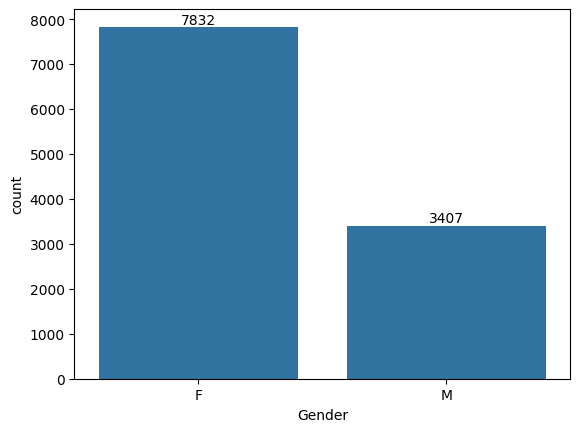

In [15]:
#Count plot of purchases by gender
ax = sns.countplot(data = df, x ='Gender')

#Annotate bars with count values
for bars in ax.containers:
    ax.bar_label(bars)

  Gender    Amount
0      F  74335853
1      M  31913276


<Axes: xlabel='Gender', ylabel='Amount'>

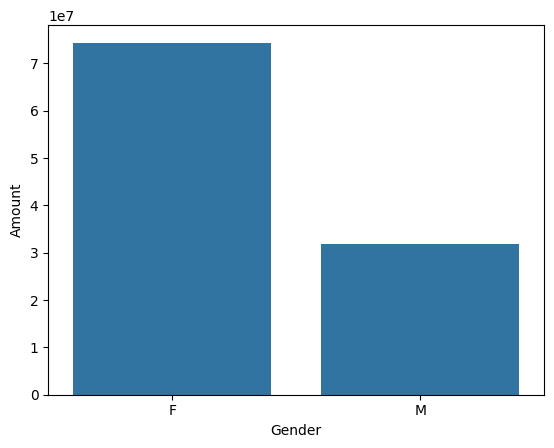

In [16]:
#Grouping by Gender to see total purchase amount
_gender_sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values('Amount', ascending = False)
print(_gender_sales_gen)

#Bar plot for total amount spent by each gender
sns.barplot(data = _gender_sales_gen, x ='Gender', y = 'Amount')

> **Observations Based on Gender Distribution**
>
> - The dataset reveals that the **number of female buyers is significantly higher** compared to male buyers during the Diwali festive season.
> - In addition to higher participation, **female customers also contributed more to overall sales revenue**, indicating a stronger purchasing behavior.
> - This trend underscores the importance of **female consumers as a key demographic** for festive marketing and promotional strategies, and suggests that businesses may benefit from tailoring campaigns to better engage and attract female shoppers.


### Age Group

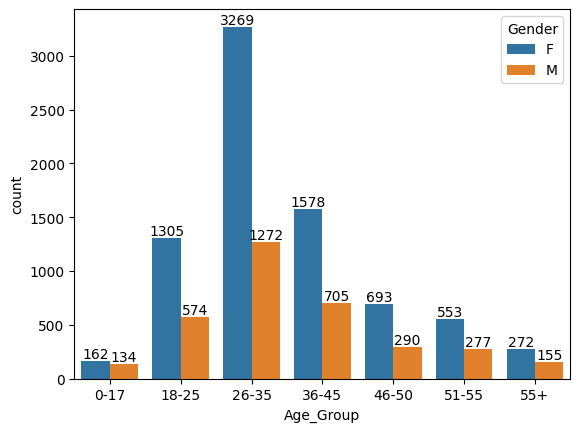

In [17]:
#Count plot of purchases by age group and gender
ax = sns.countplot(data = df, x = 'Age_Group', hue = 'Gender', order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])

#Annotate bars
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age_Group', ylabel='Amount'>

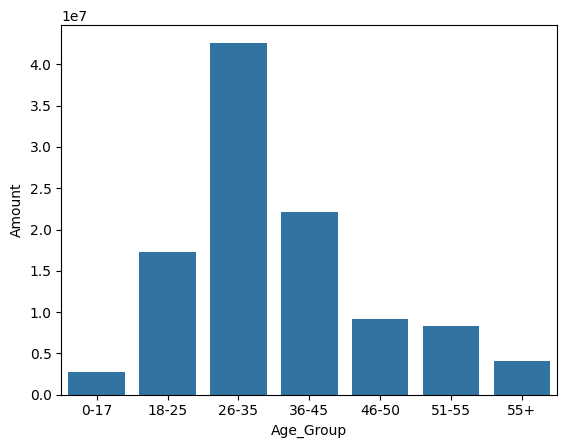

In [18]:
#Group by age group to get total amount
_age_group_sales_gen = df.groupby(['Age_Group'], as_index = False)['Amount'].sum()


#Bar plot for age group and total amount spent
sns.barplot(_age_group_sales_gen, x = 'Age_Group', y = 'Amount', order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])

> **Observations Based on Age-Group Distribution**
>
> - The **age groups 26–35**, **36–45**, and **18–25** represent the most active customer segments in terms of purchase behavior, with a notable participation from **female customers**.
> - These age brackets accounted for the **highest number of orders**, suggesting they are the most engaged during the festive shopping period.
> - A similar trend is reflected in the **total amount spent**, indicating that not only do these groups shop more frequently, but they also contribute significantly to overall sales revenue.
> - This highlights the importance of targeting young to middle-aged adults, particularly women, in marketing strategies during festive seasons.


### State

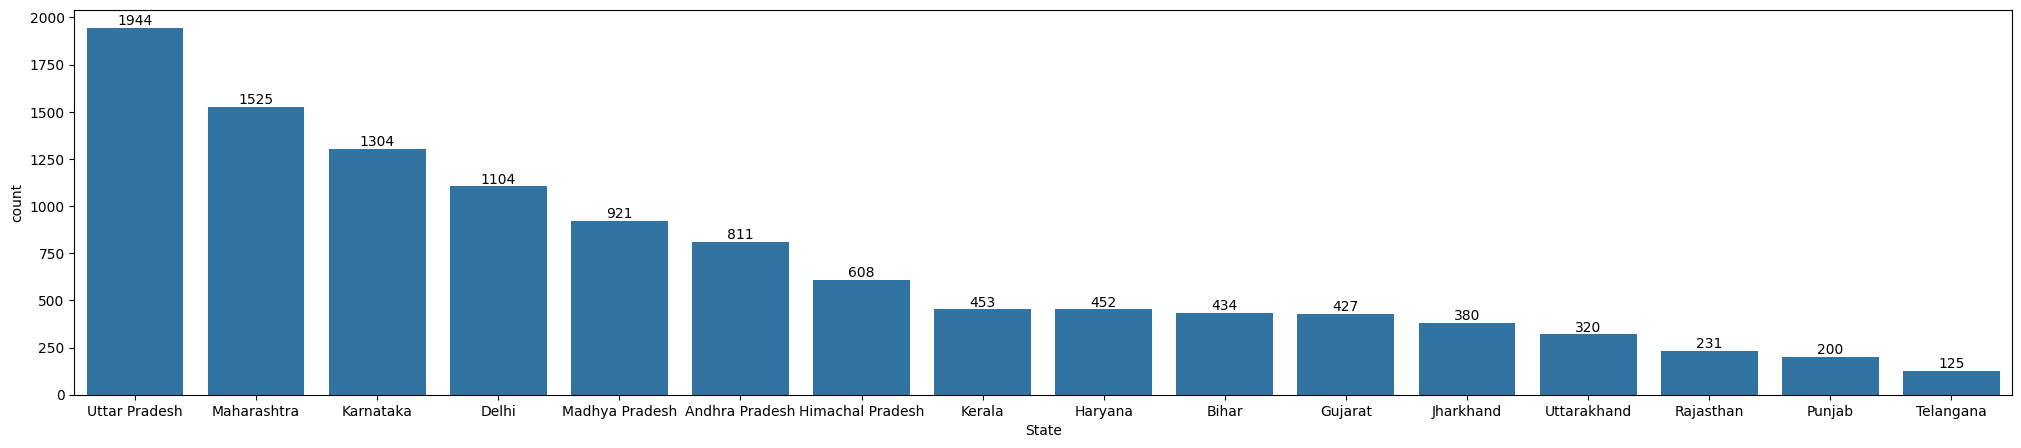

In [19]:
#Count plot of purchases by states
_state_order = df['State'].value_counts().index

plt.figure(figsize=(25, 5))
ax = sns.countplot(data = df, x = 'State', order = _state_order)

#Bar plot
for bars in ax.containers:
    ax.bar_label(bars)

               State    Amount
14     Uttar Pradesh  19374968
10       Maharashtra  14427543
7          Karnataka  13523540
2              Delhi  11603818
9     Madhya Pradesh   8101142
0     Andhra Pradesh   8037146
5   Himachal Pradesh   4963368
4            Haryana   4220175
1              Bihar   4022757
3            Gujarat   3946082
8             Kerala   3894491
6          Jharkhand   3026456
15       Uttarakhand   2520944
12         Rajasthan   1909409
11            Punjab   1525800
13         Telangana   1151490


<Axes: xlabel='State', ylabel='Amount'>

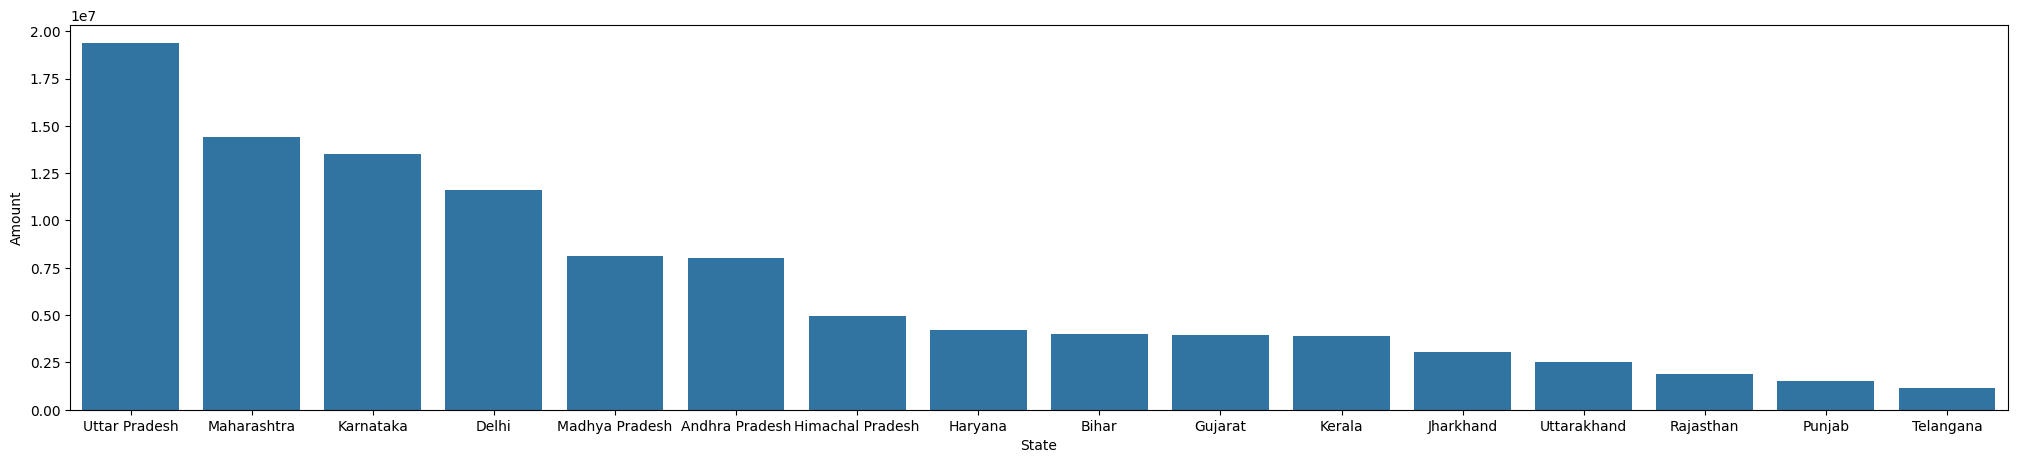

In [20]:
#state wise total gennerated sales
_state_sales_gen = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values('Amount', ascending = False)
print(_state_sales_gen)

plt.figure(figsize=(25, 5))
sns.barplot(data = _state_sales_gen, x ='State', y = 'Amount')

               State  Orders
14     Uttar Pradesh    4807
10       Maharashtra    3810
7          Karnataka    3240
2              Delhi    2740
9     Madhya Pradesh    2252
0     Andhra Pradesh    2051
5   Himachal Pradesh    1568
8             Kerala    1137
4            Haryana    1109
3            Gujarat    1066
1              Bihar    1062
6          Jharkhand     953
15       Uttarakhand     824
12         Rajasthan     555
11            Punjab     495
13         Telangana     312


<Axes: xlabel='State', ylabel='Orders'>

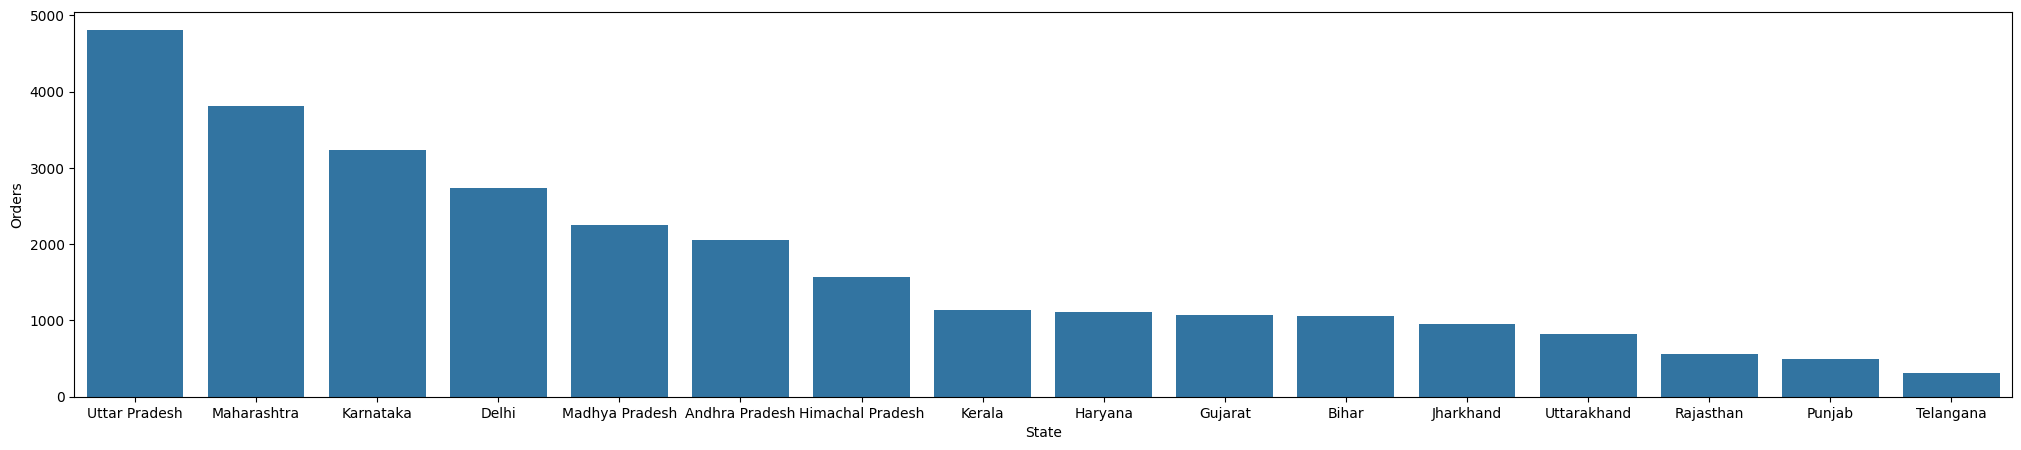

In [21]:
#state wise total orders
_state_orders = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values('Orders', ascending = False)
print(_state_orders)

plt.figure(figsize=(25, 5))
sns.barplot(data = _state_orders, x ='State', y = 'Orders')

> **Observations Based on State**
>
> - Among the 15 states represented in the dataset, **Uttar Pradesh**, **Maharashtra**, **Karnataka**, **Delhi**, and **Madhya Pradesh** emerged as the top contributors in terms of customer activity during the Diwali festive season.
> - These states recorded the **highest number of orders** and also **generated the maximum revenue**, indicating strong consumer engagement and purchasing power.
> - The concentration of sales in these regions suggests that they are key markets for retailers during festivals, and could be strategically targeted for marketing and promotional campaigns.

### Marital Status

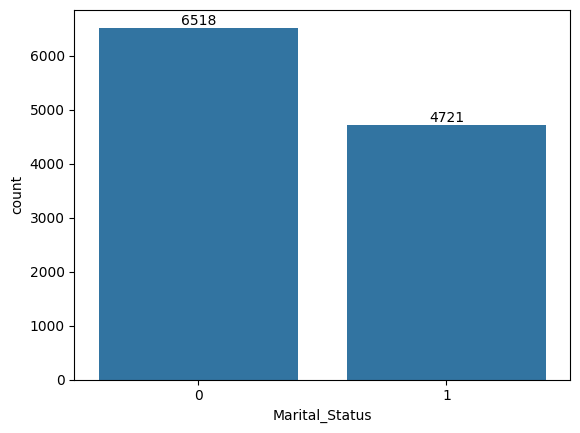

In [22]:
#Count plot by marital status
ax = sns.countplot(data = df, x = 'Marital_Status')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

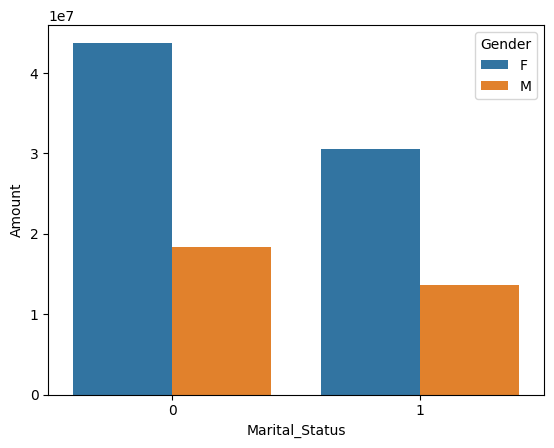

In [23]:
#Group by marital status and gender
_marital_status_gender_sales_gen = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values('Amount', ascending = False)

sns.barplot(data = _marital_status_gender_sales_gen, x = 'Marital_Status', y = 'Amount', hue = 'Gender')

> **Observations Based on Marital Status**
>
> - The data indicates that **a majority of the buyers are unmarried**, making up more than half of the total customer base during the festive season.
> - When analyzing revenue, **unmarried female customers contributed the highest overall sales**, highlighting them as a highly valuable demographic segment.
> - These insights suggest that the store could benefit from implementing **targeted marketing strategies to attract more married customers**, while also focusing on **customer retention campaigns for the unmarried segment**, particularly women, to sustain and grow festive season sales.


### Occupation

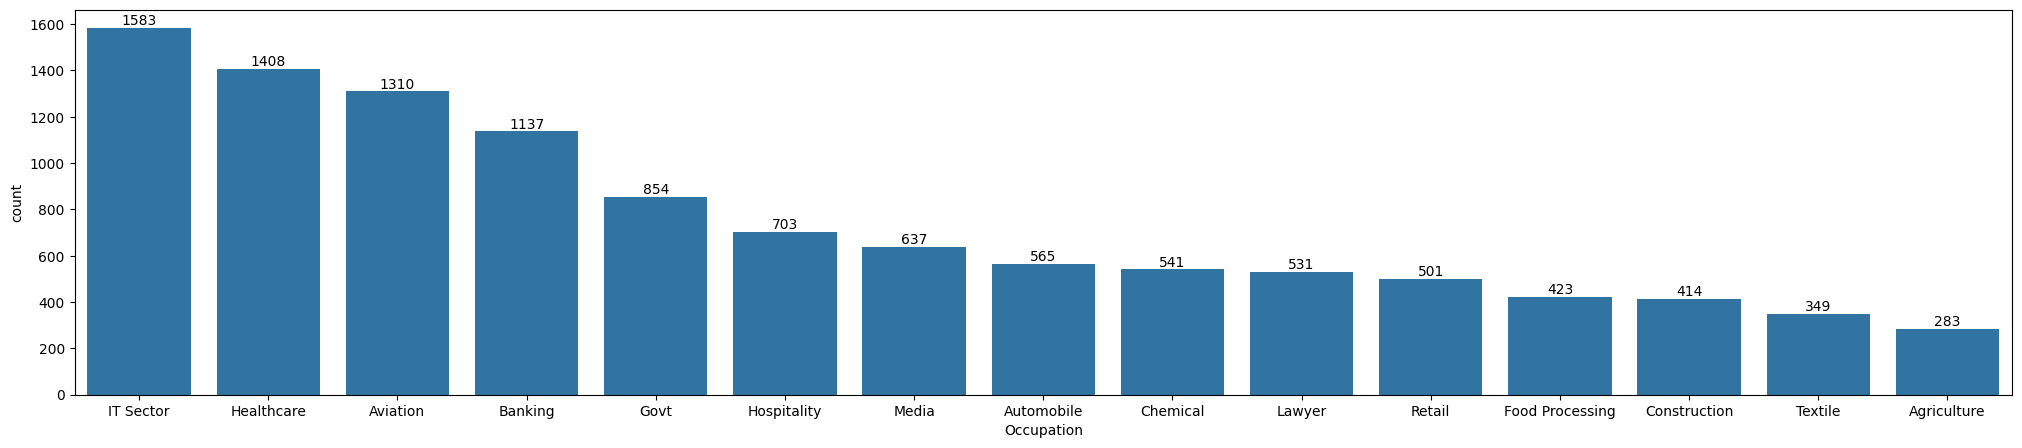

In [24]:
#count plot based on occupation
_occupation_order = df['Occupation'].value_counts().index

plt.figure(figsize=(25, 5))
ax = sns.countplot(data = df, x = 'Occupation', order = _occupation_order)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

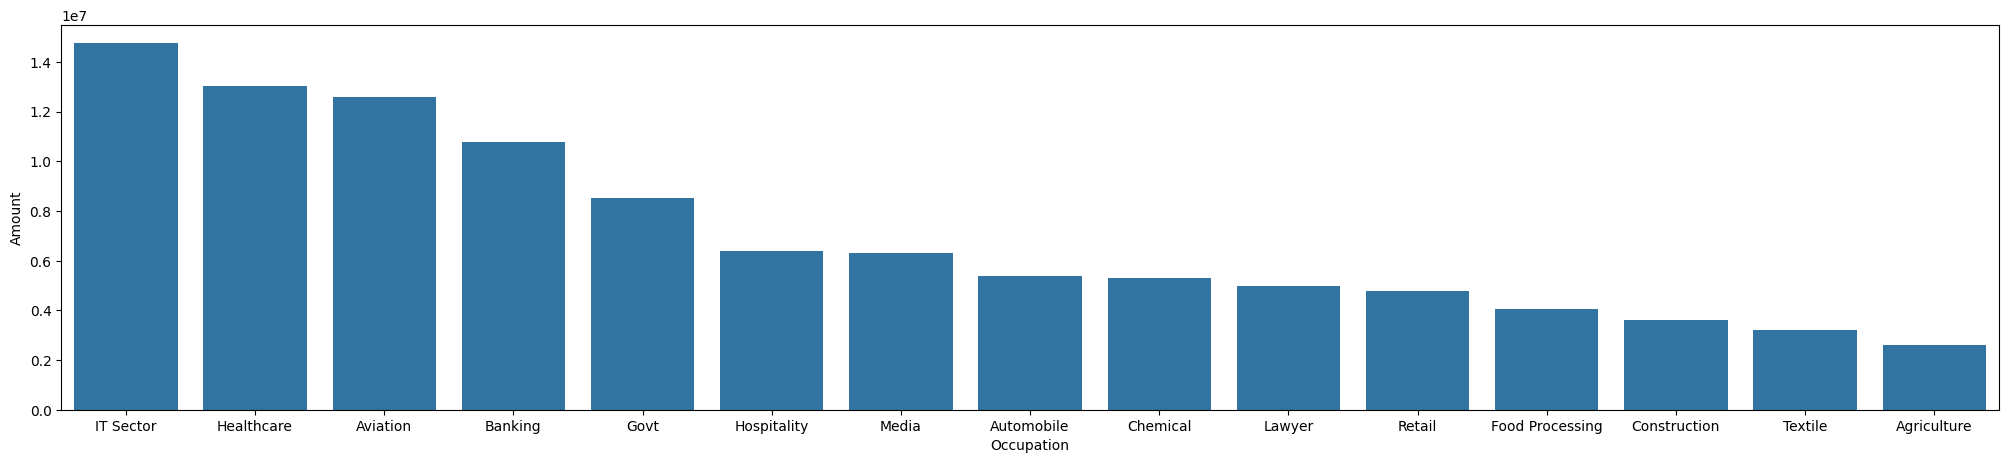

In [25]:
# sales generated by occupation
_occupation_sales_gen = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values('Amount', ascending = False)

plt.figure(figsize=(25, 5))
sns.barplot(data = _occupation_sales_gen, x = 'Occupation', y= 'Amount')

<Axes: xlabel='Occupation', ylabel='Orders'>

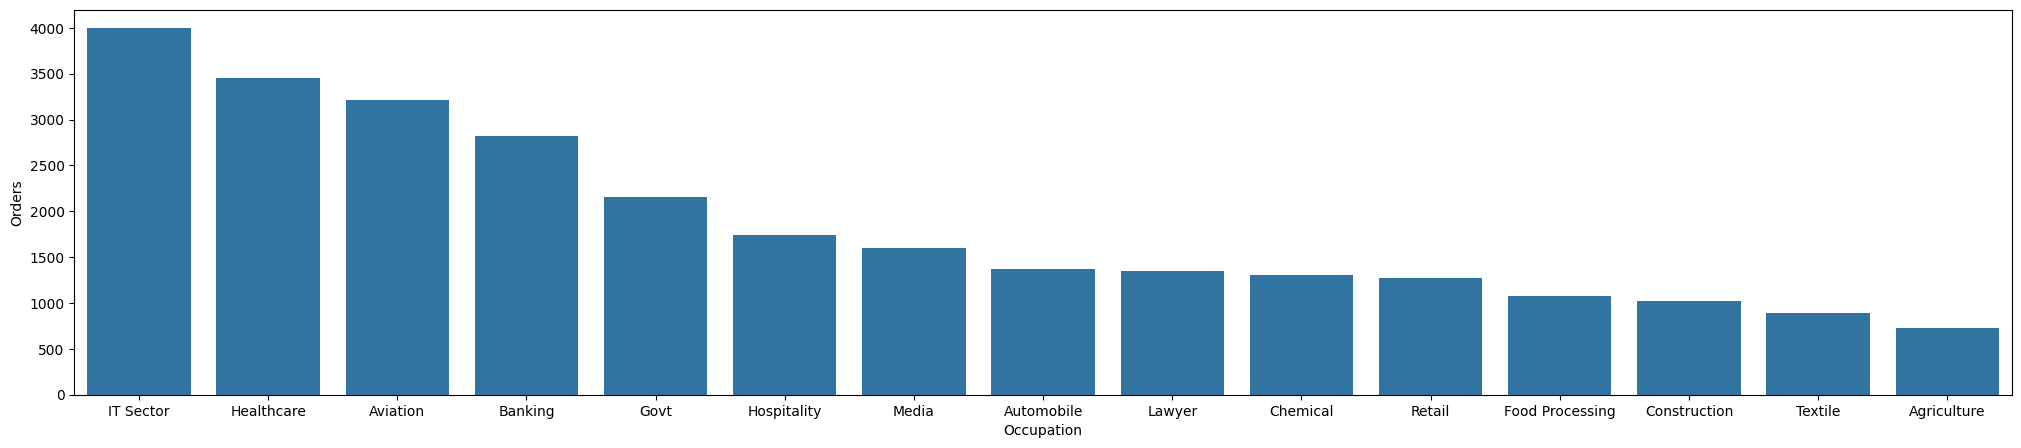

In [26]:
#orders places by occupation
_occupation_orders_gen = df.groupby(['Occupation'], as_index = False)['Orders'].sum().sort_values('Orders', ascending = False)

plt.figure(figsize=(25, 5))
sns.barplot(data = _occupation_orders_gen, x = 'Occupation', y= 'Orders')

> **Observations Based on Occupation**
>
> - Analysis of the total number of buyers, orders placed, and sales generated during the festive season indicates that customers employed in the **IT Sector**, **Healthcare**, **Aviation**, **Banking**, and **Government** sectors are the most active and profitable segments.
> - These occupations are consistently associated with **higher purchase volumes and greater spending**, reflecting a stronger **buying capacity** compared to customers working in other industries.
> - This insight suggests that businesses could benefit from designing **occupation-specific promotions** or **corporate partnership programs** targeting these high-value professional groups during peak seasons.


### Product Category

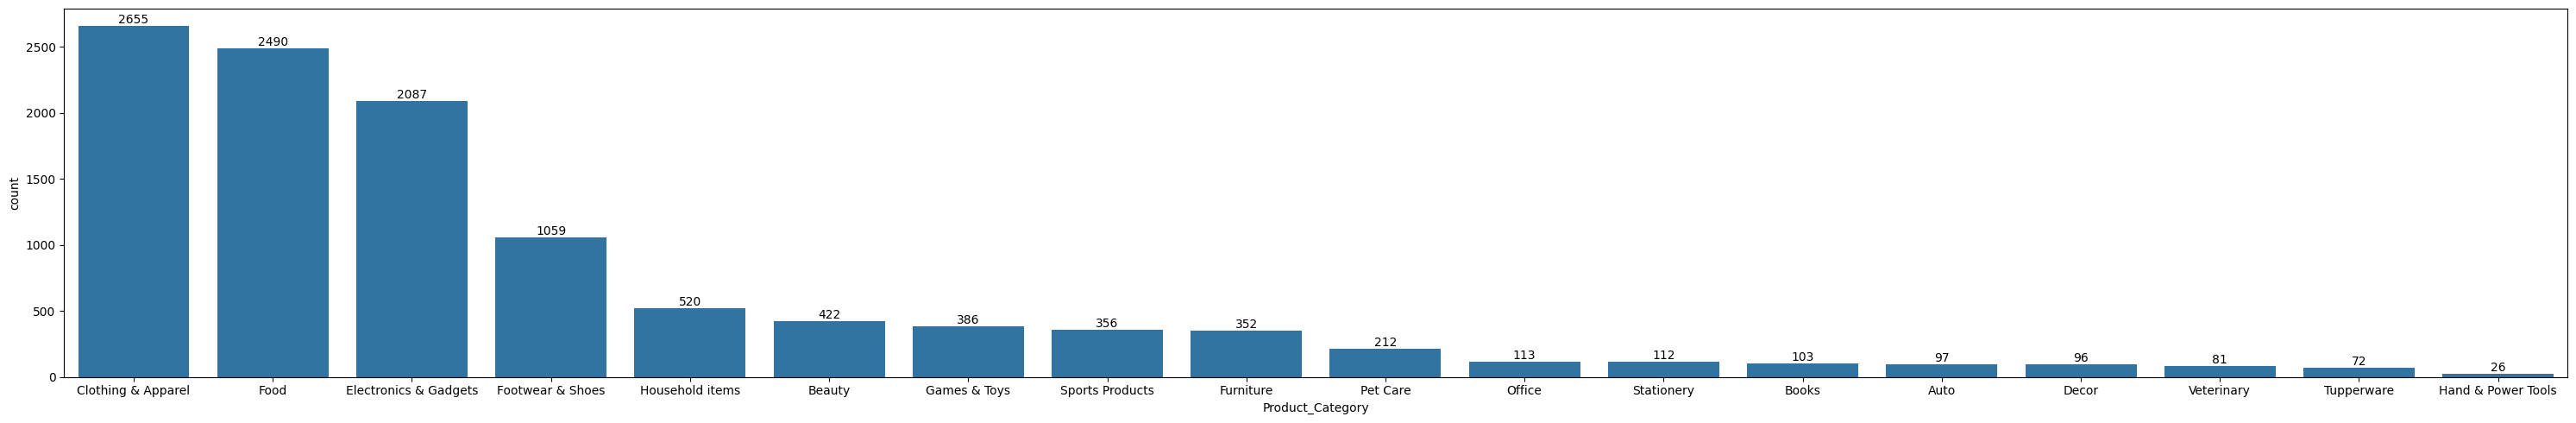

In [27]:
#Count plot by product category
_product_category_order = df['Product_Category'].value_counts().index

plt.figure(figsize=(30, 5))
ax = sns.countplot(data = df, x = 'Product_Category', order = _product_category_order)

for bars in ax.containers:
    ax.bar_label(bars)

plt.tight_layout()

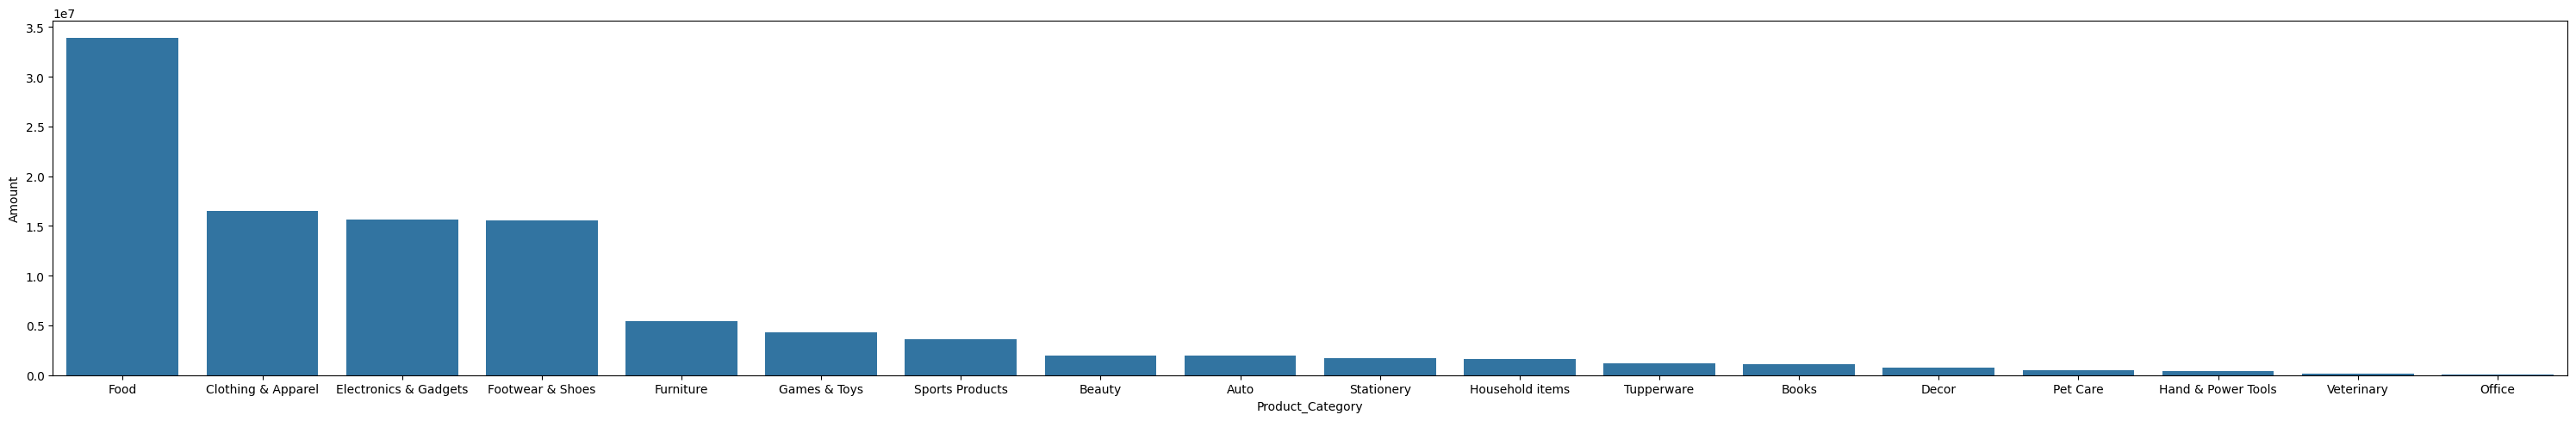

In [28]:
#sales generated by individual product category
_product_category_sales_gen = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values('Amount', ascending = False)

plt.figure(figsize=(30, 5))
sns.barplot(data = _product_category_sales_gen, x = 'Product_Category', y = 'Amount')
plt.tight_layout()

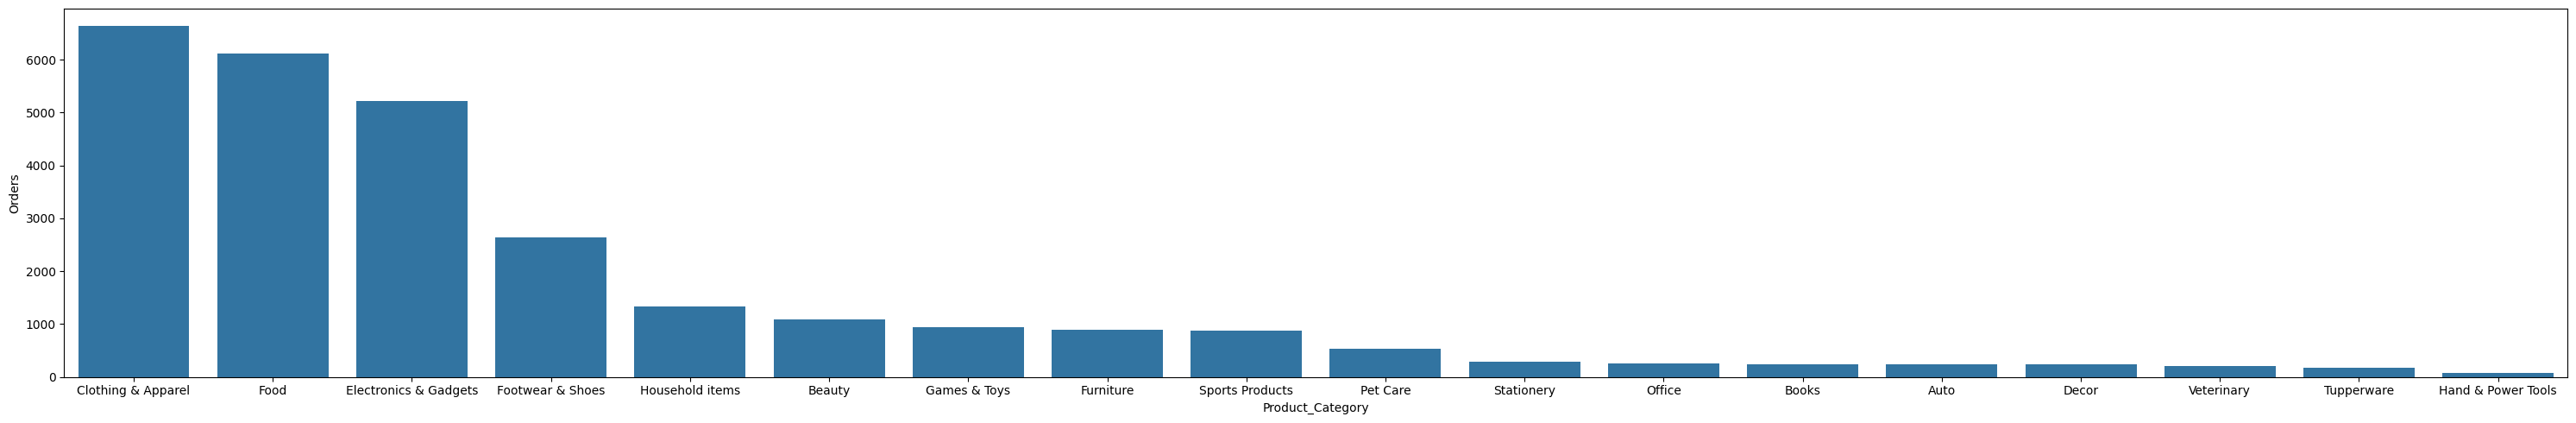

In [29]:
#orders placed for individual product category
_product_category_orders_gen = df.groupby(['Product_Category'], as_index = False)['Orders'].sum().sort_values('Orders', ascending = False)

plt.figure(figsize=(30, 5))
sns.barplot(data = _product_category_orders_gen, x = 'Product_Category', y = 'Orders')
plt.tight_layout()

> **Observations Based on Product Category**
>
> - The majority of customer purchases during the festive season were concentrated in categories such as **Clothing and Apparel**, **Food**, **Electronics and Gadgets**, **Footwear and Shoes**, and **Household Items**, indicating their popularity and relevance for festive shopping.
> - When analyzing overall revenue generated, the **Food category** stands out as the top contributor, followed by **Clothing and Apparel**, **Electronics and Gadgets**, **Footwear and Shoes**, and **Furniture**.
> - These findings highlight the importance of focusing inventory, marketing, and promotional efforts on these **high-performing categories** to maximize both customer satisfaction and sales during peak seasons.


### Product ID

     Product_ID  Amount
1679  P00265242  540136
644   P00110942  424833
1146  P00184942  401816
654   P00112142  341020
396   P00059442  338571
1504  P00237542  322363
388   P00058042  307040
642   P00110742  294548
643   P00110842  290661
492   P00080342  283309


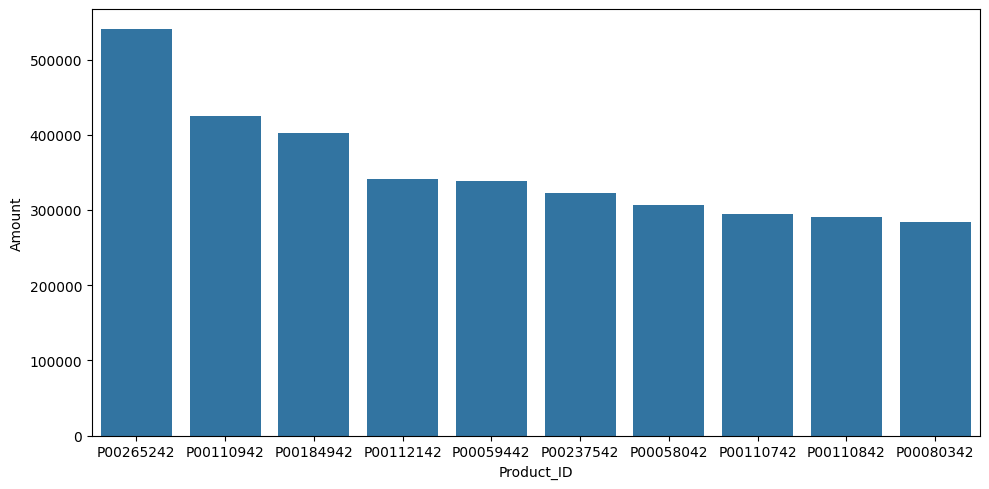

In [30]:
#top 10 selling products
_top_sales_product_id = df.groupby(['Product_ID'], as_index = False)['Amount'].sum().sort_values('Amount', ascending = False).head(10)
print(_top_sales_product_id)

plt.figure(figsize=(10, 5))
sns.barplot(data = _top_sales_product_id, x = 'Product_ID', y = 'Amount')
plt.tight_layout()

     Product_ID  Orders
1679  P00265242     127
644   P00110942     116
1504  P00237542      91
1146  P00184942      82
171   P00025442      79
679   P00114942      79
888   P00145042      76
708   P00117942      76
298   P00044442      75
643   P00110842      74


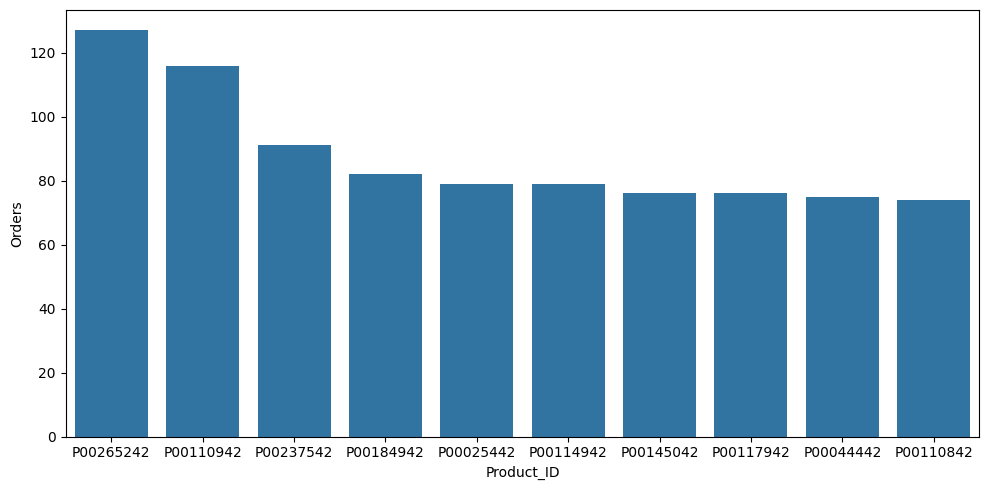

In [31]:
#top 10 ordered products
_top_orders_product_id = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values('Orders', ascending = False).head(10)
print(_top_orders_product_id)

plt.figure(figsize=(10, 5))
sns.barplot(data = _top_orders_product_id, x = 'Product_ID', y = 'Orders')
plt.tight_layout()

> **Observations Based on Product IDs**
>
> - The products that generated the **highest total revenue** during the Diwali festive season include the following IDs:  
>   **P00265242**, **P00110942**, **P00184942**, **P00112142**, **P00059442**, **P00237542**, **P00058042**, **P00110742**, **P00110842**, and **P00080342**.
> - The **most frequently ordered products**, based on order volume, are: **P00265242**, **P00110942**, **P00237542**, **P00184942**, **P00025442**, **P00114942**, **P00145042**, **P00117942**, **P00044442**, and **P00110842**.
> - The repeated appearance of several product IDs in both top revenue and top order lists indicates that these items are not only popular but also **highly profitable**, making them essential products for inventory and promotional focus in future festive campaigns.

----------------------------

## Conclusion

This analysis of Diwali sales data has provided valuable insights into customer behavior, sales trends, and high-performing segments during the festive season. These findings can help businesses tailor their marketing, inventory, and sales strategies to better align with customer preferences and maximize profits during high-demand periods.

### Key Takeaways:

- **Demographics Matter**:
  - **Female customers** are more active shoppers and contribute significantly to overall revenue.
  - **Unmarried individuals**, especially women aged **26–35**, are the most engaged and high-spending customer segment.

- **Geographical Trends**:
  - States such as **Uttar Pradesh**, **Maharashtra**, **Karnataka**, **Delhi**, and **Madhya Pradesh** dominate in terms of both order volume and sales value, making them prime regions for targeted marketing efforts.

- **Occupational Insights**:
  - Professionals from sectors like **IT**, **Healthcare**, **Aviation**, **Banking**, and **Government** exhibit higher purchasing power and engagement, indicating potential for industry-specific promotions or loyalty programs.

- **Product Preferences**:
  - Categories like **Food**, **Clothing and Apparel**, **Electronics and Gadgets**, and **Footwear** are top contributors to both sales and order volumes.
  - Certain products (e.g., Product ID **P00265242**, **P00110942**) are consistently among the top-selling and most-ordered items, suggesting high demand and strong customer preference.

### Business Recommendations:

- Focus festive promotions and discounts on **young adult female shoppers**, especially those in the **unmarried** category.
- Prioritize marketing efforts in **high-performing states** and regions with strong customer engagement.
- Expand product offerings and inventory in **top-performing categories** and stock more of the **high-revenue products**.
- Launch **occupation-targeted campaigns** or bundles for sectors with higher spending trends.
- Implement **customer retention strategies** for your most valuable segments to ensure long-term growth beyond seasonal sales.

---

Thank You!!!
